<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/tarea_2/fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2
##Diagramas con datos de la FIFA

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.express as px

Subimos nuestro archivo CSV de la FIFA

In [8]:
archivo_fifa = files.upload()

Saving fifa_datos.csv to fifa_datos (1).csv


Tratamos los datos para su correcta utilización en un DataFrame

In [9]:
fifa = pd.read_csv(io.StringIO(archivo_fifa['fifa_datos.csv'].decode('utf-8')))
fifa['Weight'] = fifa['Weight'].str.replace("lbs","").astype({"Weight": float}, errors='raise') # Tratamos los datos para pasarlos de String a float64 
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Diagrama pastel del peso usando Matplot

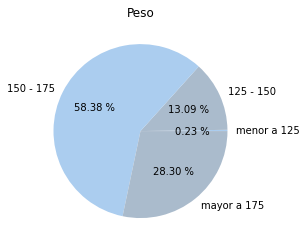

In [ ]:
menor125 = fifa.loc[fifa['Weight'] < 125.0].count()[0]
entre125y150 = fifa.loc[(fifa['Weight'] > 125.0) & (fifa['Weight'] < 150.0)].count()[0]
entre150y175 = fifa.loc[(fifa['Weight'] > 150.0) & (fifa['Weight'] < 175.0)].count()[0]
mayor175 = fifa.loc[fifa['Weight'] > 175.0].count()[0]

plt.figure()

etiquetas = ['menor a 125', '125 - 150', '150 - 175', 'mayor a 175']
colores = ['#abcdef', '#aabbcc']
plt.pie([menor125, entre125y150, entre150y175, mayor175], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Peso')
plt.show()

Diagrama pastel del peso usando Plotly

In [ ]:
menor125 = fifa.loc[fifa['Weight'] < 125.0].count()[0]
entre125y150 = fifa.loc[(fifa['Weight'] > 125.0) & (fifa['Weight'] < 150.0)].count()[0]
entre150y175 = fifa.loc[(fifa['Weight'] > 150.0) & (fifa['Weight'] < 175.0)].count()[0]
mayor175 = fifa.loc[fifa['Weight'] > 175.0].count()[0]
all = [menor125, entre125y150, entre150y175, mayor175]

fig = px.pie(values=[menor125, entre125y150, entre150y175, mayor175], names=['menor a 125', 'entre 125 y 150', 'entre 150 y 175', 'mayor a 175'], labels={"value": "peso", "variable": "valor"})

fig.show()

Diagrama de barras detallando la habilidad usando Matplot

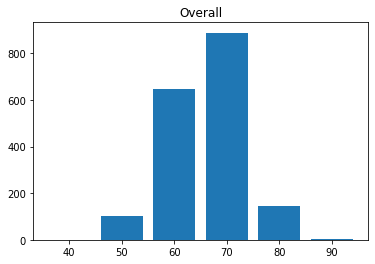

In [ ]:
overall40 = fifa.loc[fifa['Overall'] == 40].count()[0]
overall50 = fifa.loc[fifa['Overall'] == 50].count()[0]
overall60 = fifa.loc[fifa['Overall'] == 60].count()[0]
overall70 = fifa.loc[fifa['Overall'] == 70].count()[0]
overall80 = fifa.loc[fifa['Overall'] == 80].count()[0]
overall90 = fifa.loc[fifa['Overall'] == 90].count()[0]

etiquetas = ['40', '50', '60', '70', '80', '90']
valores = [overall40, overall50, overall60, overall70, overall80, overall90]
plt.figure()
plt.title('Overall')
barras = plt.bar(etiquetas, valores)

plt.show()  

Diagrama de barras detallando la habilidad usando Plotly

In [ ]:
df = pd.DataFrame(data=valores, columns=['Overall'])
df['Habilidad'] = etiquetas

fig = px.bar(df, x='Habilidad', y='Overall')
fig.show()

Reportes del CSV utilizando Pandas

In [11]:
fifa_report = pd.pivot_table(fifa, index=["Nationality", "Club"], values=["Weight", "Overall"], aggfunc=[np.sum, np.mean], fill_value=0)
fifa_report.head()

sum           mean       
                               Overall Weight Overall Weight
Nationality Club                                            
Afghanistan Notts County            60    143    60.0  143.0
            Philadelphia Union      59    150    59.0  150.0
            SV Meppen               63    152    63.0  152.0
            Walsall                 62    152    62.0  152.0
Albania     AC Ajaccio              66    176    66.0  176.0

In [4]:
template = files.upload()

Necesitamos crear una plantilla en HTML con un t[itulo y contenido

In [12]:
from jinja2 import Environment, FileSystemLoader

env = Environment(loader=FileSystemLoader('.'))
template = env.get_template('template.html')
template_vars = {"title" : "FIFA - Reportes de peso y habilidad por Club y Nacionalidad", "report_table": fifa_report.to_html()}

html_out = template.render(template_vars)

Luego lo transformamos en PDF

In [13]:
from weasyprint import HTML
HTML(string=html_out).write_pdf("report.pdf") # El resultado se genera en un archivo aparte

In [33]:
!pip install weasyprint==52.5

     |████████████████████████████████| 365 kB 7.9 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=3789a515654d415290aa2782efcb0a656f4d5aa515435688924c9de4512169d4
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi
